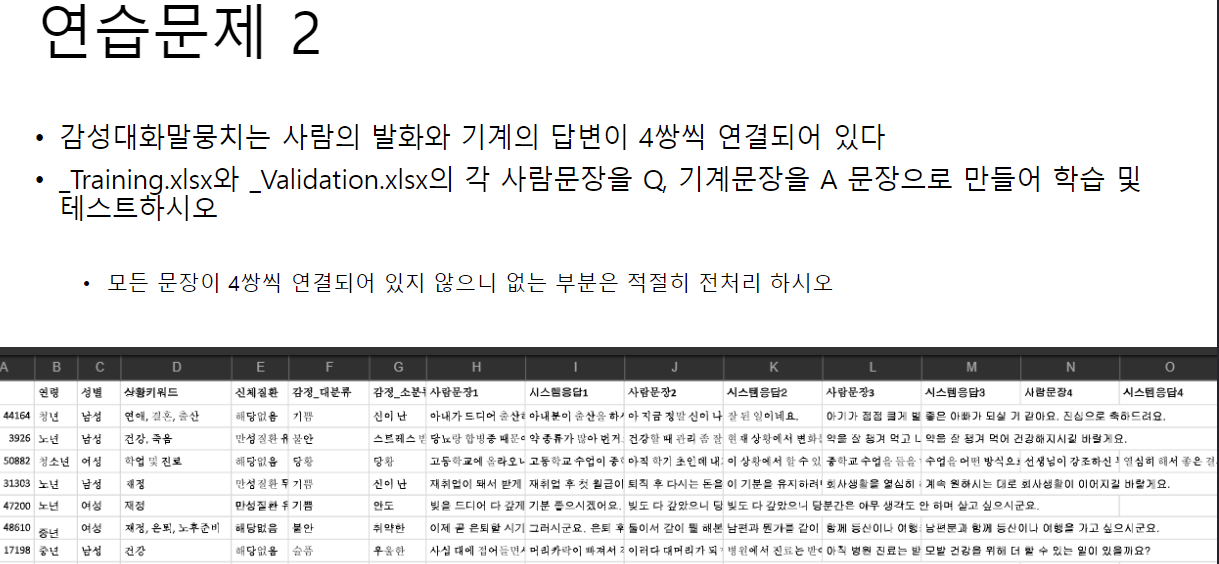

In [67]:
path = "C:\\pytest\\감성대화말뭉치\\"
training_name = "감성대화말뭉치(최종데이터)_Training.xlsx"
validation_name = "감성대화말뭉치(최종데이터)_Validation.xlsx"
DATA_OUT_PATH = path + 'data\\'
model_name = 'senti'


In [22]:
import pandas as pd

data1 = pd.read_excel(path+training_name)
data2 = pd.read_excel(path+validation_name)
data_merge = pd.concat([data1.iloc[:, 7:], data2.iloc[:, 7:]], axis=1)


Q = pd.DataFrame()
A = pd.DataFrame()
for e, i in enumerate(data_merge.columns):
    if e % 2 == 0:
        Q = pd.concat([Q, data_merge.iloc[:, e]])
    else:
        A = pd.concat([A, data_merge.iloc[:, e]])

story = pd.concat([Q, A], axis=1)
story.dropna(inplace=True)
story.columns=['Q','A']
data=story.iloc[:500,:]
data

,Q,A
0,아내가 드디어 출산하게 되어서 정말 신이 나.,아내분이 출산을 하시는군요. 정말 축하드려요.
1,당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.,약 종류가 많아 번거로우시겠어요.
2,고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워.,고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요.
3,재취업이 돼서 받게 된 첫 월급으로 온 가족이 외식을 할 예정이야. 너무 행복해.,재취업 후 첫 월급이라 정말 기쁘시겠어요.
4,빚을 드디어 다 갚게 되어서 이제야 안도감이 들어.,기분 좋으시겠어요. 앞으로는 어떻게 하실 생각이신가요?
...,...,...
495,회사 사람들이 내가 안 씻은 걸 알고 나를 쳐다보는 것 같더라고.,안 씻고 출근해서 남의 시선이 의식되었나 보네요.
496,이번 승진 시험 잘 볼 수 있을까? 너무 불안해.,시험을 앞두고 있어 걱정되시는군요.
497,동호회 사람들이랑 같이 있어도 무인도에 홀로 있는 기분이야. 고립되어 있는 것 같아.,사람들과 함께 있어도 고립되어 있는 느낌을 받으시는 군요.
498,나이가 먹으니 직장생활이 너무 힘들고 막막해.,나이로 인해 직장생활이 힘드시군요.


In [23]:
inputs, outputs = list(data['Q']), list(data['A'])


In [24]:
outputs_input = data.A.apply(lambda x: '<SOS> '+x+' <EOS>')
outputs_target = data.A.apply(lambda x: x+' <EOS>')


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
inputs_series = pd.Series(inputs)
inputs_outputs = pd.concat([inputs_series, outputs_input], axis=0)
tokenizer = Tokenizer(num_words=None, char_level=False, lower=False)
tokenizer.fit_on_texts(inputs_outputs)
word_index = tokenizer.word_index
print('\n전체에서 %s개의 고유한 토큰을 찾았습니다.' % len(word_index))
# print('word_index:', word_index)
print('vocab_size:', len(word_index))



전체에서 3483개의 고유한 토큰을 찾았습니다.
vocab_size: 3483


In [75]:
tokenizer.word_index

{'너무': 3,
 '많이': 4,
 '것': 5,
 '때문에': 6,
 '안': 7,
 '나': 8,
 '친구가': 9,
 '내': 10,
 '정말': 11,
 '어떤': 12,
 '내가': 13,
 '같아': 14,
 '수': 15,
 '어떻게': 16,
 '요즘': 17,
 '무슨': 18,
 '기분이': 19,
 '마음이': 20,
 '해서': 21,
 '못': 22,
 '화가': 23,
 '더': 24,
 '않아': 25,
 '오늘': 26,
 '일이': 27,
 '잘': 28,
 '게': 29,
 '왜': 30,
 '갑자기': 31,
 '나를': 32,
 '나는': 33,
 '자세히': 34,
 '다': 35,
 '남편이': 36,
 '사람이': 37,
 '봐': 38,
 '하고': 39,
 '했는데': 40,
 '말을': 41,
 '있는': 42,
 '없어': 43,
 '우리': 44,
 '봐요': 45,
 '들어': 46,
 '한': 47,
 '좋은': 48,
 '아내가': 49,
 '열심히': 50,
 '걱정이': 51,
 '있어': 52,
 '일을': 53,
 '하는': 54,
 '같이': 55,
 '그런': 56,
 '일': 57,
 '친구': 58,
 '이번에': 59,
 '혼자': 60,
 '나이가': 61,
 '그': 62,
 '해': 63,
 '있는데': 64,
 '없어서': 65,
 '같아요': 66,
 '이제': 67,
 '보고': 68,
 '속상해': 69,
 '돈을': 70,
 '다른': 71,
 '친구와': 72,
 '나서': 73,
 '생각이': 74,
 '있을까요': 75,
 '말씀해': 76,
 '힘드시겠어요': 77,
 '전에': 78,
 '않아서': 79,
 '난': 80,
 '회사에서': 81,
 '집에': 82,
 '것이': 83,
 '기뻐': 84,
 '좀': 85,
 '친구를': 86,
 '주시겠어요': 87,
 '있으신가요': 88,
 '속상하시겠어요': 89,
 '된': 90,
 '회사에': 91,
 '딸

In [29]:
import os
import pickle
if os.path.exists(DATA_OUT_PATH+model_name):
    print("{}--Folder already exists\n".format(DATA_OUT_PATH))
else:
    os.makedirs(DATA_OUT_PATH+model_name, exist_ok=True)
    print("{}--Folder create complete\n".format(DATA_OUT_PATH))
with open(DATA_OUT_PATH+model_name+"\\transformer.pickle", "wb") as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)


C:\pytest\감성대화말뭉치\data\--Folder create complete



In [30]:
encoder_input = tokenizer.texts_to_sequences(list(inputs))
print('\nResult of encoder_input sequencing:')
print(inputs[0], encoder_input[0])
print(inputs[1], encoder_input[1])
print(inputs[2], encoder_input[2])



Result of encoder_input sequencing:
아내가 드디어 출산하게 되어서 정말 신이 나. [49, 279, 1184, 213, 11, 280, 8]
당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야. [1185, 1186, 6, 1187, 134, 389, 1188, 1189, 1190, 601]
고등학교에 올라오니 중학교 때보다 수업이 갑자기 어려워져서 당황스러워. [1191, 1192, 602, 1193, 603, 31, 1194, 98]


In [31]:
decoder_input = tokenizer.texts_to_sequences(list(outputs_input))
decoder_target = tokenizer.texts_to_sequences(list(outputs_target))
print('\nResult of decoder_input sequencing:')
print(outputs_input[0], decoder_input[0])
print(outputs_input[1], decoder_input[1])
print(outputs_input[2], decoder_input[2])

print('\nResult of decoder_target sequencing:')
print(outputs_target[0], decoder_target[0])
print(outputs_target[1], decoder_target[1])
print(outputs_target[2], decoder_target[2])



Result of decoder_input sequencing:
<SOS> 아내분이 출산을 하시는군요. 정말 축하드려요. <EOS> [1, 1083, 2599, 263, 11, 1084, 2]
<SOS> 약 종류가 많아 번거로우시겠어요. <EOS> [1, 556, 2600, 318, 2601, 2]
<SOS> 고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요. <EOS> [1, 2602, 603, 602, 2603, 337, 31, 1085, 2604, 2]

Result of decoder_target sequencing:
아내분이 출산을 하시는군요. 정말 축하드려요. <EOS> [1083, 2599, 263, 11, 1084, 2]
약 종류가 많아 번거로우시겠어요. <EOS> [556, 2600, 318, 2601, 2]
고등학교 수업이 중학교 때와는 다르게 갑자기 어려워서 당황스러우시군요. <EOS> [2602, 603, 602, 2603, 337, 31, 1085, 2604, 2]


In [34]:
sentence_max_length = inputs_outputs.apply(lambda x: len(x.split())).max()
print('sentence max length:', sentence_max_length)


sentence max length: 25


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
encoder_input_pad = pad_sequences(encoder_input, maxlen=sentence_max_length, padding='post')
decoder_input_pad = pad_sequences(decoder_input, maxlen=sentence_max_length, padding='post')
decoder_target_pad = pad_sequences(decoder_target, maxlen=sentence_max_length, padding='post')


In [36]:
print('\nencoder_input_padshape:', encoder_input_pad.shape)
print("inputs:", inputs[1])
print("encoder_input:", encoder_input[1])
print("encoder_input_pad:", encoder_input_pad[1])
print('\ndecoder_input_padshape:', decoder_input_pad.shape)
print("outputs_input:", outputs_input[1])
print("decoder_input:", decoder_input[1])
print("decoder_input_pad:", decoder_input_pad[1])
print('\ndecoder_target_padshape:', decoder_target_pad.shape)
print("outputs_target:", outputs_target[1])
print("decoder_target:", decoder_target[1])
print("decoder_target_pad:", decoder_target_pad[1])



encoder_input_padshape: (500, 25)
inputs: 당뇨랑 합병증 때문에 먹어야 할 약이 열 가지가 넘어가니까 스트레스야.
encoder_input: [1185, 1186, 6, 1187, 134, 389, 1188, 1189, 1190, 601]
encoder_input_pad: [1185 1186    6 1187  134  389 1188 1189 1190  601    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]

decoder_input_padshape: (500, 25)
outputs_input: <SOS> 약 종류가 많아 번거로우시겠어요. <EOS>
decoder_input: [1, 556, 2600, 318, 2601, 2]
decoder_input_pad: [   1  556 2600  318 2601    2    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]

decoder_target_padshape: (500, 25)
outputs_target: 약 종류가 많아 번거로우시겠어요. <EOS>
decoder_target: [556, 2600, 318, 2601, 2]
decoder_target_pad: [ 556 2600  318 2601    2    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]


In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
import enum
import os
import re
import json
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt


In [38]:
SEED_NUM = 1234
tf.random.set_seed(SEED_NUM)


In [39]:
PAD_INDEX = 0
STD_INDEX = 1
END_INDEX = 2

index_inputs = encoder_input_pad
index_outputs = decoder_input_pad
index_targets = decoder_target_pad

char2idx_dict = word_index
idx2char_dict = {y: x for x, y in word_index.items()}


In [40]:
char2idx_dict['<PAD>'] = 0
char2idx_dict['<SOS>'] = char2idx_dict['SOS']
del char2idx_dict['SOS']
char2idx_dict['<END>'] = char2idx_dict['EOS']
del char2idx_dict['EOS']
idx2char_dict[0] = '<PAD>'
idx2char_dict[1] = '<SOS>'
idx2char_dict[2] = '<END>'


In [42]:
prepro_configs = dict({'char2idx': char2idx_dict, 'idx2char': idx2char_dict, 'vocab_size': len(word_index), 'pad_symbol': '<PAD>', 'std_symbol': '<SOS>', 'end_symbol': '<END>'})
# print(prepro_configs)


In [69]:
char2idx = prepro_configs['char2idx']
end_index = prepro_configs['end_symbol']
vocab_size = prepro_configs['vocab_size']
BATCH_SIZE = 2
MAX_SEQUENCE = 25
EPOCHS = 20
VALID_SPLIT = 0.1


In [44]:
kargs = {'model_name': model_name, 'num_layers': 2, 'd_model': 512, 'num_heads': 8, 'dff': 2048, 'input_vocab_size': vocab_size, 'target_vocab_size': vocab_size, 'maximum_position_encoding': MAX_SEQUENCE, 'end_token_idx': char2idx[end_index], 'rate': 0.1}


In [45]:
def create_padding_mask(seq):
    mask = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return mask[:, tf.newaxis, tf.newaxis, :]


In [46]:
def create_look_ahead_mask(size):
    mask = 1-tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask


In [47]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)
    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
    return enc_padding_mask, combined_mask, dec_padding_mask


In [48]:
enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(index_inputs, index_outputs)


In [49]:
tf.linalg.band_part(tf.ones((8, 8)), -1, 0)

<tf.Tensor: shape=(8, 8), dtype=float32, numpy=
array([[1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0.],
       [1., 1., 1., 1., 1., 1., 1., 0.],
       [1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32)>

In [50]:
def get_angles(pos, i, d_model):
    angle_rates = 1/np.power(10000, (2*i//2)/np.float32(d_model))
    return pos*angle_rates


In [51]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(np.arange(position)[:, np.newaxis],
                            np.arange(d_model)[np.newaxis, :],
                            d_model)

    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    pos_encoding = angle_rads[np.newaxis, ...]
    return tf.cast(pos_encoding, dtype=tf.float32)


In [52]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)
    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk/tf.math.sqrt(dk)
    if mask is not None:
        scaled_attention_logits += (mask*-1e9)
    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
    output = tf.matmul(attention_weights, v)
    return output, attention_weights


In [53]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super().__init__()
        self.num_heads = kargs['num_heads']
        self.d_model = kargs['d_model']

        assert self.d_model % self.num_heads == 0

        self.depth = self.d_model//self.num_heads
        self.wq = tf.keras.layers.Dense(kargs['d_model'])
        self.wk = tf.keras.layers.Dense(kargs['d_model'])
        self.wv = tf.keras.layers.Dense(kargs['d_model'])
        self.dense = tf.keras.layers.Dense(kargs['d_model'])

    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
        
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]
        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)
        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)
        scaled_attention, attention_weights = scaled_dot_product_attention(q, k, v, mask)
        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])
        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
        return output, attention_weights


In [54]:
def feed_forward_network(**kargs):
    return tf.keras.Sequential([tf.keras.layers.Dense(kargs['dff'], activation='relu'), tf.keras.layers.Dense(kargs['d_model'])])


In [55]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super().__init__()
        self.mha = MultiHeadAttention(**kargs)
        self.ffn = feed_forward_network(**kargs)
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])

    def call(self, x, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output)
        out1 = self.layernorm1(x+attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output)
        out2 = self.layernorm2(out1+ffn_output)
        return out2


In [57]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super().__init__()
        self.mha1 = MultiHeadAttention(**kargs)
        self.mha2 = MultiHeadAttention(**kargs)
        self.ffn = feed_forward_network(**kargs)
        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout2 = tf.keras.layers.Dropout(kargs['rate'])
        self.dropout3 = tf.keras.layers.Dropout(kargs['rate'])

    def call(self, x, enc_output, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1)
        out1 = self.layernorm1(attn1+x)
        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2)
        out2 = self.layernorm2(attn2+out1)
        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output)
        out3 = self.layernorm3(ffn_output+out2)
        return out3, attn_weights_block1, attn_weights_block2


In [58]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super().__init__()
        self.d_model = kargs['d_model'] # 512
        self.num_layers = kargs['num_layers'] # 2
        self.embedding = tf.keras.layers.Embedding(input_dim=kargs['input_vocab_size'], output_dim=self.d_model)
        self.pos_encoding = positional_encoding(position=kargs['maximum_position_encoding'], d_model=self.d_model)
        self.enc_layers = [EncoderLayer(**kargs)for _ in range(self.num_layers)]
        self.dropout = tf.keras.layers.Dropout(kargs['rate'])

    def call(self, x, mask):
        seq_len = tf.shape(x)[1]
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x)
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, mask)
        return x


In [59]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, **kargs):
        super().__init__()
        self.d_model = kargs['d_model']
        self.num_layers = kargs['num_layers']
        self.embedding = tf.keras.layers.Embedding(input_dim=kargs['target_vocab_size'], output_dim=self.d_model)
        self.pos_encoding = positional_encoding(position=kargs['maximum_position_encoding'], d_model=self.d_model)
        self.dec_layers = [DecoderLayer(**kargs) for _ in range(self.num_layers)]
        self.dropout = tf.keras.layers.Dropout(kargs['rate'])

    def call(self, x, enc_output, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}
        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]
        x = self.dropout(x)
        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, look_ahead_mask, padding_mask)
            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
        return x, attention_weights


In [60]:
class Transformer(tf.keras.Model):
    def __init__(self, **kargs):
        super().__init__(name=kargs['model_name'])
        self.end_token_idx = kargs['end_token_idx']
        self.encoder = Encoder(**kargs)
        self.decoder = Decoder(**kargs)
        self.final_layer = tf.keras.layers.Dense(kargs['target_vocab_size'])

    def call(self, x):
        inp, tar = x
        enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
        enc_output = self.encoder(inp, enc_padding_mask)
        dec_output, _ = self.decoder(tar, enc_output, look_ahead_mask, dec_padding_mask)
        final_output = self.final_layer(dec_output)
        return final_output

    def inference(self, x):
        inp = x
        tar = tf.expand_dims([STD_INDEX], axis=0)
        enc_padding_mask, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
        enc_output = self.encoder(inp, enc_padding_mask)

        predict_tokens = list()
        for t in range(0, MAX_SEQUENCE):
            dec_output, _ = self.decoder(tar, enc_output, look_ahead_mask, dec_padding_mask)
            final_output = self.final_layer(dec_output)
            outputs = tf.argmax(final_output, axis=-1).numpy()
            pred_token = outputs[0][-1]
            if pred_token == self.end_token_idx:
                break
            predict_tokens.append(pred_token)
            tar = tf.expand_dims([STD_INDEX]+predict_tokens, axis=0)
            _, look_ahead_mask, dec_padding_mask = create_masks(inp, tar)
        return predict_tokens


In [61]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy')

def loss(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)
    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    return tf.reduce_mean(loss_)


In [62]:
def accuracy(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    mask = tf.expand_dims(tf.cast(mask, dtype=pred.dtype), axis=-1)
    pred *= mask
    acc = train_accuracy(real, pred)
    return tf.reduce_mean(acc)


In [63]:
model = Transformer(**kargs)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-4), loss=loss, metrics=[accuracy])

In [64]:
earlystop_callback = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=10)
checkpoint_path = DATA_OUT_PATH+model_name+'/weights.h5'
checkpoint_dir = os.path.dirname(checkpoint_path)

if os.path.exists(checkpoint_dir):
    print("{}--Folder already exists\n".format(checkpoint_dir))
else:
    os.makedirs(checkpoint_dir, exist_ok=True)
    print("{}--Folder create complete\n".format(checkpoint_dir))
checkpointer = ModelCheckpoint(checkpoint_path, monitor='val_accuracy', verbose=1, save_best_only=True, save_weights_only=True)


C:\pytest\감성대화말뭉치\data\senti--Folder already exists



In [65]:
def plot_graphs(history,string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string],'')
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,'val_'+string])
    plt.show()

Epoch 1/20
225/225 [==============================] - ETA: 0s - loss: 0.6386 - accuracy: 0.7445
Epoch 00001: val_accuracy improved from -inf to 0.74441, saving model to C:\pytest\감성대화말뭉치\data\senti\weights.h5
225/225 [==============================] - 38s 167ms/step - loss: 0.6386 - accuracy: 0.7445 - val_loss: 0.7548 - val_accuracy: 0.7444
Epoch 2/20
225/225 [==============================] - ETA: 0s - loss: 0.5768 - accuracy: 0.7456
Epoch 00002: val_accuracy improved from 0.74441 to 0.74560, saving model to C:\pytest\감성대화말뭉치\data\senti\weights.h5
225/225 [==============================] - 38s 171ms/step - loss: 0.5768 - accuracy: 0.7456 - val_loss: 0.7989 - val_accuracy: 0.7456
Epoch 3/20
225/225 [==============================] - ETA: 0s - loss: 0.5280 - accuracy: 0.7465
Epoch 00003: val_accuracy improved from 0.74560 to 0.74771, saving model to C:\pytest\감성대화말뭉치\data\senti\weights.h5
225/225 [==============================] - 39s 174ms/step - loss: 0.5280 - accuracy: 0.7465 - val_l

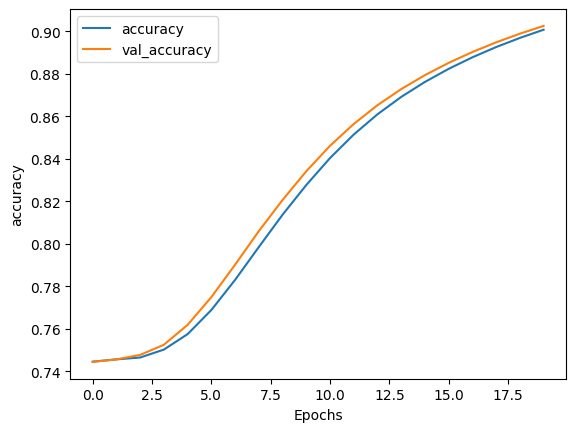

In [70]:
history = model.fit([index_inputs, index_outputs], index_targets, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_split=VALID_SPLIT, callbacks=[earlystop_callback, checkpointer])
plot_graphs(history, 'accuracy')


In [74]:
def qna(text):
    encoder_input = tokenizer.texts_to_sequences(list([text]))
    pred = model.inference(np.array(encoder_input))
    return ' '.join([idx2char_dict[i] for i in pred])+"."

user_input = input()
for n in range(1, 6):
    print(f"{n}: {user_input}")
    user_input=qna(user_input)

1: 뭔가 이상한데요.
2: 어떤 일 때문에 찜찜하시군요.
3: 무슨 일 있었나 보네요 학원을 아예 가지 않았던 거예요.
4: 남편 분이 실직 당하신 것도 힘드신데 시어머님께서 그러셨다니 많이 상처 받았겠어요.
5: 아빠가 아직까지 오지 않으셨군요 속이 타시겠어요.


In [88]:
def qna(text):
    encoder_input = tokenizer.texts_to_sequences(list([text]))
    pred = model.inference(np.array(encoder_input))
    return ' '.join([idx2char_dict[i] for i in pred])+"."

user_input = input()
for n in range(1, 6):
    print(f"{n}: {user_input}")
    user_input=qna(user_input)

1: 뭔가 이상한데요.
2: 어떤 일 때문에 찜찜하시군요.
3: 무슨 일 있었나 보네요 학원을 아예 가지 않았던 거예요.
4: 남편 분이 실직 당하신 것도 힘드신데 시어머님께서 그러셨다니 많이 상처 받았겠어요.
5: 아빠가 아직까지 오지 않으셨군요 속이 타시겠어요.


In [89]:


model.predict(np.array(tokenizer.texts_to_sequences(list(["안녕 친구야."]))))


OperatorNotAllowedInGraphError: in user code:

    c:\projects\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:1462 predict_function  *
        return step_function(self, iterator)
    C:\Users\광주인공지능사관학교\AppData\Local\Temp\ipykernel_50168\2584763711.py:10 call  *
        inp, tar = x
    c:\projects\venv\lib\site-packages\tensorflow\python\framework\ops.py:503 __iter__
        self._disallow_iteration()
    c:\projects\venv\lib\site-packages\tensorflow\python\framework\ops.py:496 _disallow_iteration
        self._disallow_when_autograph_enabled("iterating over `tf.Tensor`")
    c:\projects\venv\lib\site-packages\tensorflow\python\framework\ops.py:474 _disallow_when_autograph_enabled
        " indicate you are trying to use an unsupported feature.".format(task))

    OperatorNotAllowedInGraphError: iterating over `tf.Tensor` is not allowed: AutoGraph did convert this function. This might indicate you are trying to use an unsupported feature.
